# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Simulate employee data
np.random.seed(42)

n = 200
data = pd.DataFrame({
    'hours_worked': np.random.randint(30, 60, n),
    'project_completion_rate': np.random.uniform(0.6, 1.0, n),
    'training_hours': np.random.randint(5, 40, n),
    'attendance_percentage': np.random.uniform(70, 100, n),
    'years_at_company': np.random.randint(1, 10, n)
})

# Performance score (target)
data['performance_score'] = (
    0.3 * data['hours_worked'] +
    50 * data['project_completion_rate'] +
    0.5 * data['training_hours'] +
    0.2 * data['attendance_percentage'] +
    2 * data['years_at_company'] +
    np.random.normal(0, 5, n)
).round(2)

data.head()


,hours_worked,project_completion_rate,training_hours,attendance_percentage,years_at_company,performance_score
0,36,0.841767,34,75.090397,4,85.23
1,49,0.815936,23,89.405451,1,100.86
2,58,0.681224,21,81.648052,1,88.25
3,44,0.977141,23,76.881842,6,100.84
4,40,0.839546,32,77.978138,5,94.08


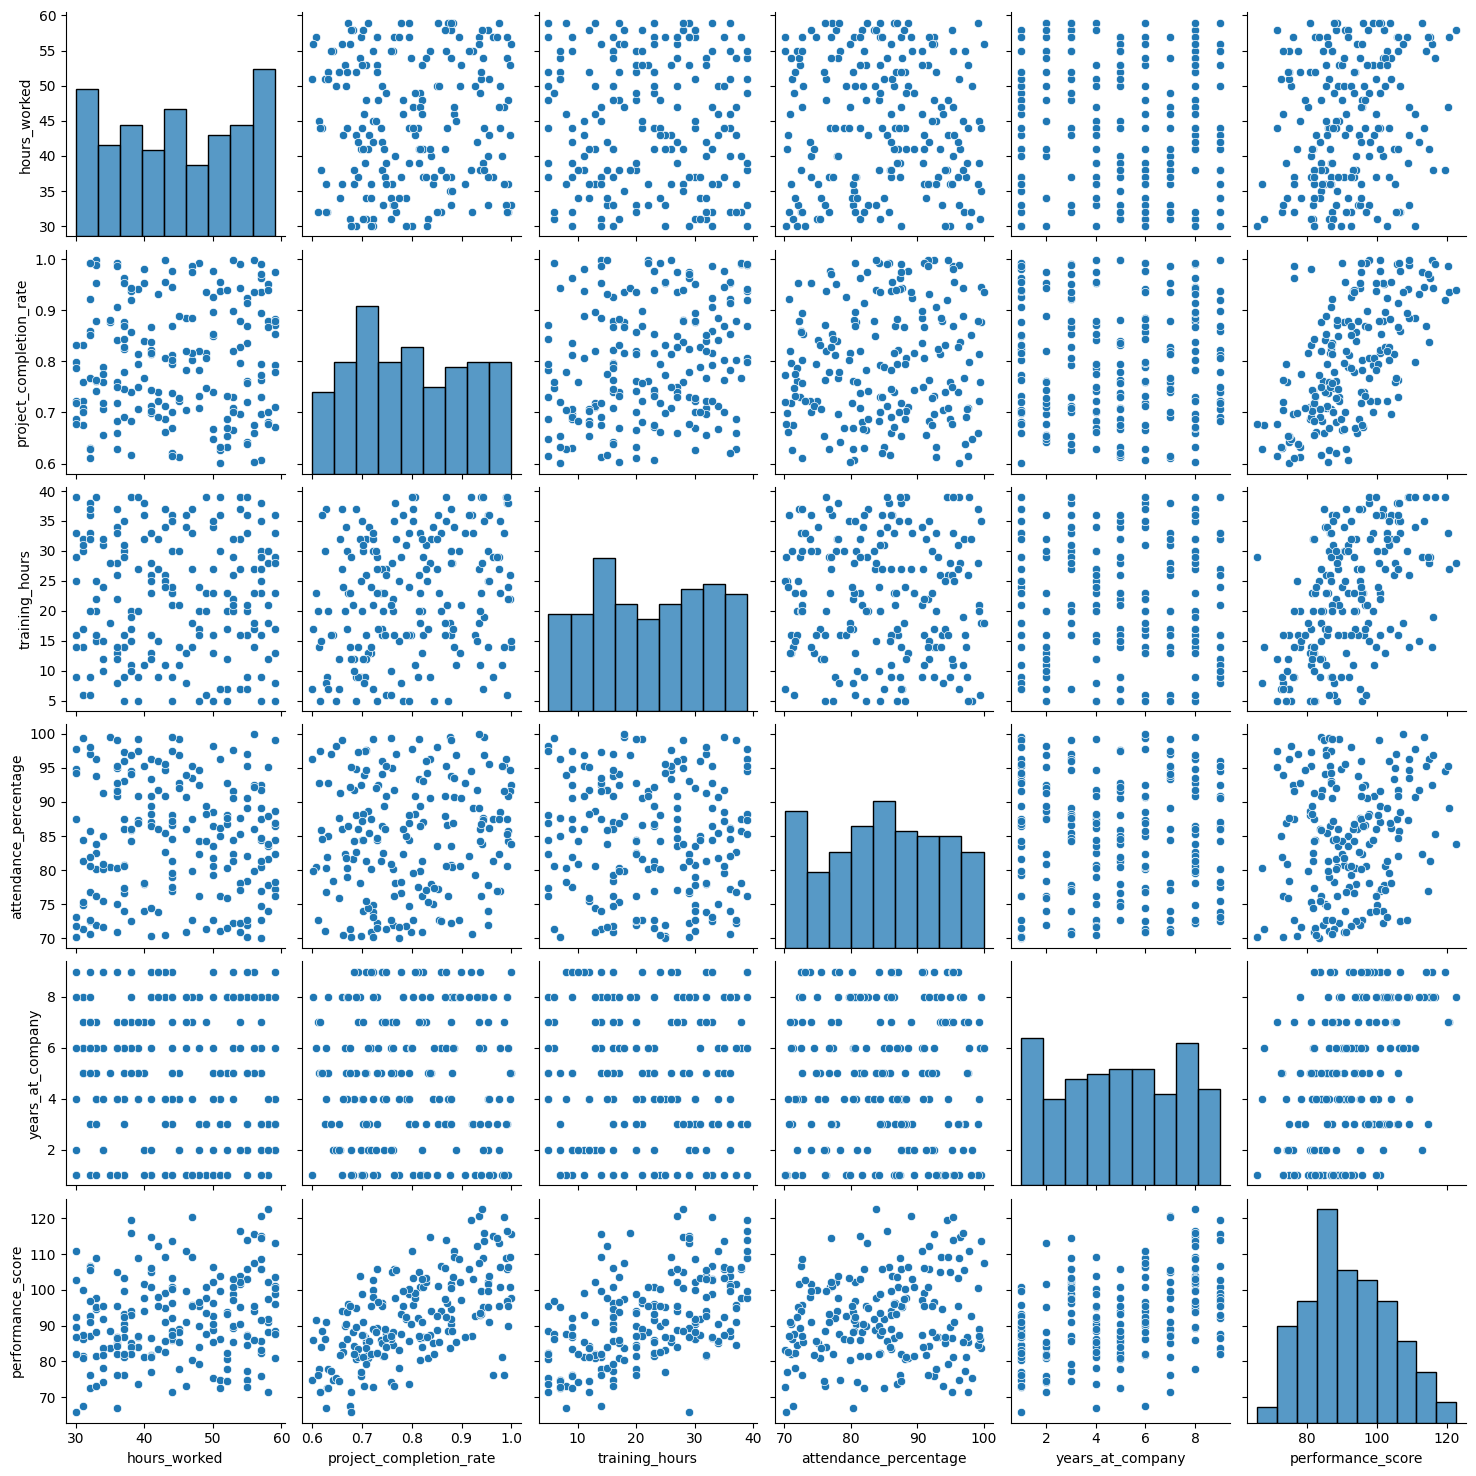

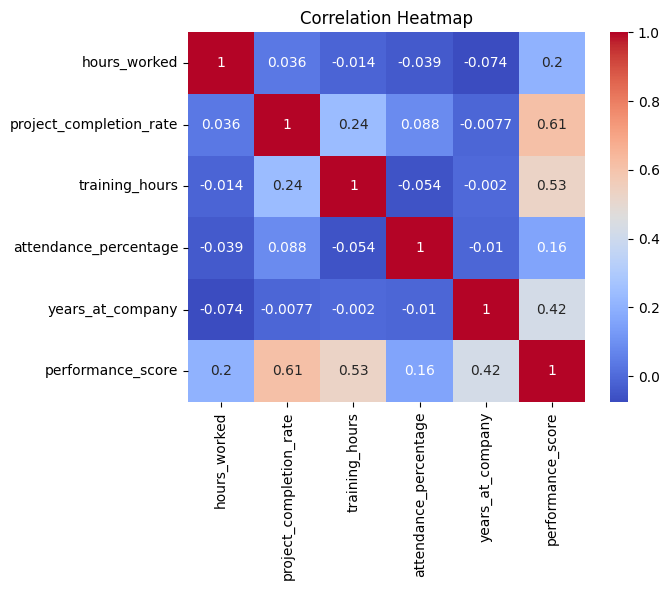

In [3]:
sns.pairplot(data)
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [4]:
# Features and Target
X = data.drop('performance_score', axis=1)
y = data['performance_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [6]:
def evaluate(model_name, y_test, y_pred):
    print(f"🔍 {model_name}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
    print("R² Score:", round(r2_score(y_test, y_pred), 2))
    print("-" * 30)

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)


🔍 Linear Regression
MAE: 4.78
R² Score: 0.72
------------------------------
🔍 Random Forest
MAE: 4.93
R² Score: 0.74
------------------------------


In [8]:
new_data = pd.DataFrame({
    'hours_worked': [45],
    'project_completion_rate': [0.85],
    'training_hours': [20],
    'attendance_percentage': [95],
    'years_at_company': [3]
})

predicted_score = rf.predict(new_data)
print("🎯 Predicted Performance Score:", round(predicted_score[0], 2))


🎯 Predicted Performance Score: 92.77


In [7]:
import joblib

joblib.dump(rf, 'employee_performance_model.pkl')  # Save model
# joblib.load('employee_performance_model.pkl')   # To load later


['employee_performance_model.pkl']